### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Sample Data

In [3]:
np.random.seed(42)
n_users = 50

data = {
    'User_ID': np.arange(1, n_users + 1),  # Normal numeric IDs
    'Posts_Per_Week': np.random.randint(1, 20, n_users),
    'Avg_Likes': np.random.randint(10, 500, n_users),
    'Avg_Comments': np.random.randint(1, 100, n_users),
    'Avg_Shares': np.random.randint(1, 50, n_users),
    'Engagement_Rate': np.random.uniform(0.1, 1.0, n_users)
}

df = pd.DataFrame(data)
df

,User_ID,Posts_Per_Week,Avg_Likes,Avg_Comments,Avg_Shares,Engagement_Rate
0,1,7,399,81,29,0.356356
1,2,15,63,8,36,0.133198
2,3,11,115,35,13,0.648608
3,4,8,269,35,32,0.552411
4,5,7,319,33,7,0.146331
5,6,19,486,5,22,0.350782
6,7,11,200,41,28,0.917439
7,8,11,411,28,2,0.315606
8,9,4,227,7,42,0.230405
9,10,8,53,73,45,0.540507


### Data Preprocessing

In [4]:
X = df.drop(columns=['User_ID'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA for Dimensionality Reduction

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

### K-Means Clustering

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

### Hierarchical Clustering

In [7]:
hier = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hier.fit_predict(X_scaled)

### DBSCAN

In [8]:
dbscan = DBSCAN(eps=1.2, min_samples=3)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

### Visualize PCA Clusters

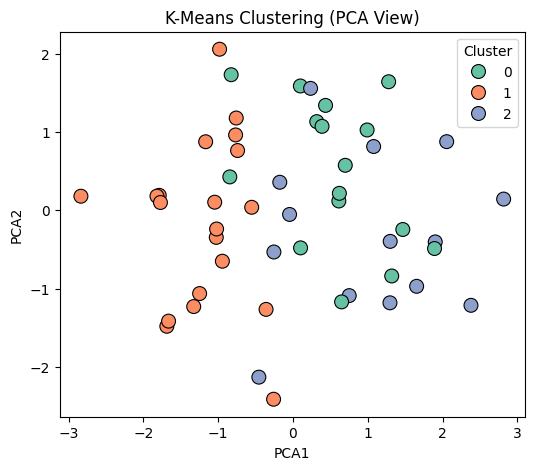

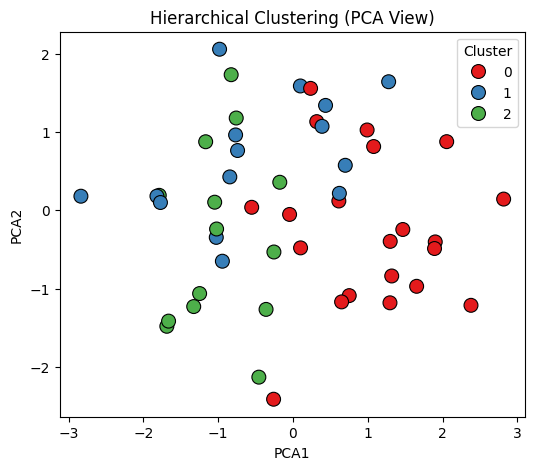

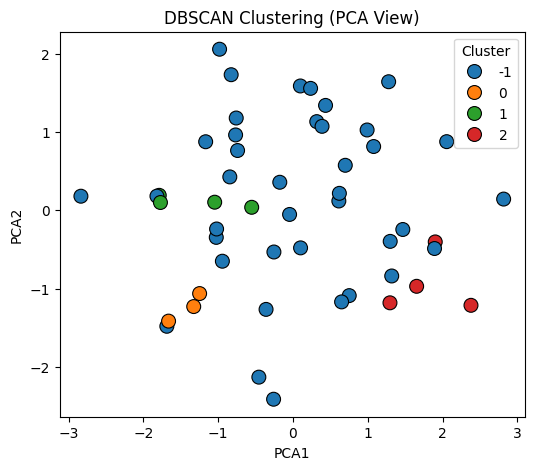

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set2', s=100, edgecolor='black')
plt.title("K-Means Clustering (PCA View)")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df, palette='Set1', s=100, edgecolor='black')
plt.title("Hierarchical Clustering (PCA View)")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='tab10', s=100, edgecolor='black')
plt.title("DBSCAN Clustering (PCA View)")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.show()

### t-SNE Visualization

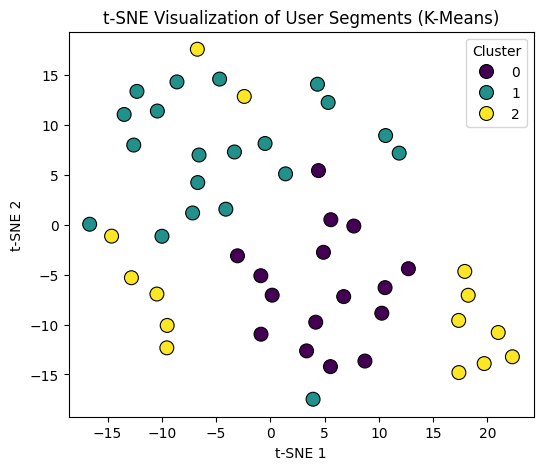

In [10]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
df['tSNE1'], df['tSNE2'] = X_tsne[:, 0], X_tsne[:, 1]

plt.figure(figsize=(6,5))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='KMeans_Cluster', data=df, palette='viridis', s=100, edgecolor='black')
plt.title("t-SNE Visualization of User Segments (K-Means)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.legend(title='Cluster')
plt.show()